# **DEPTH INFORMATION RECONSTRUCTION**

# **USING AVAILABLE OPENCV'S FUNCTION**
https://docs.opencv.org/4.x/dd/d53/tutorial_py_depthmap.html



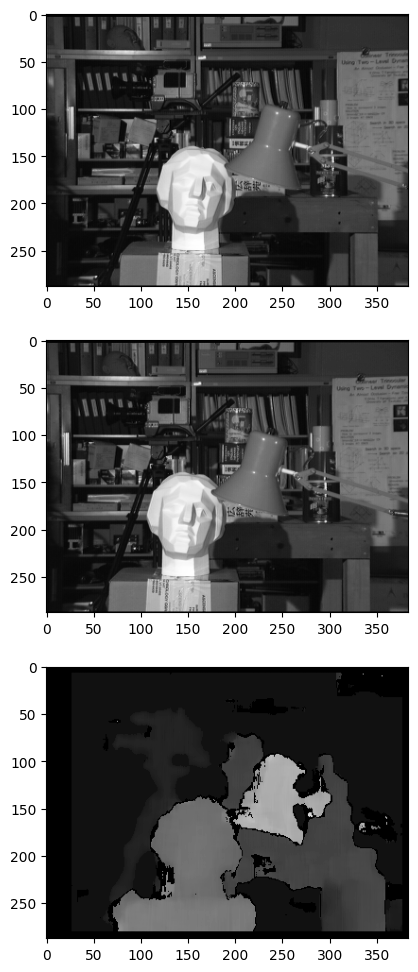

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#read image
left_img=cv2.imread('left.png',cv2.IMREAD_GRAYSCALE)
right_img=cv2.imread('right.png',cv2.IMREAD_GRAYSCALE)
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
stereo.setMinDisparity(5)
disparity = stereo.compute(left_img,right_img)

#plot original image and disparity image
fig, ax = plt.subplots(3,figsize=(12, 12))
ax[0].imshow(left_img,cmap='gray')
ax[1].imshow(right_img,cmap='gray')
ax[2].imshow(disparity,cmap='gray')


# **PIPELINE**

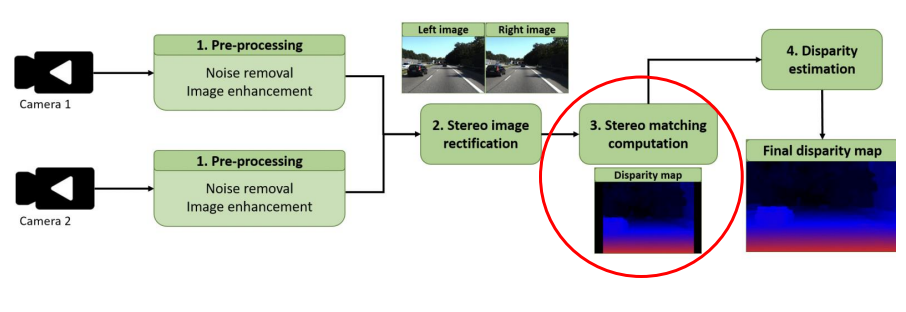

In [6]:
'''
Build a function to calculate the disparity map of two input stereo images (left image (L) and right image (R)) using
pixel-wise matching method. The calculation steps in this method can be described through the following steps:
1. Read the left (left) and right (right) images as grayscale images and convert them to np.float32.
2. Initialize two variables height, width with values ​equal to the height and width of the left image.
3. Initialize a zero-zero matrix (depth) with shape equal to (height, width).
4. For each pixel at position (ℎ, 𝑤) (browsing from left to right, top to bottom) perform the following steps:
a) Calculate the cost (L1 or L2) between the pairs of pixels 𝑙𝑒𝑓𝑡[ℎ, 𝑤] and 𝑟𝑖𝑔ℎ𝑡[ℎ, 𝑤 − 𝑑] (where 𝑑 ∈
[0, 𝑑𝑖𝑠𝑝𝑎𝑟𝑖𝑡𝑦_𝑟𝑎𝑛𝑔𝑒]) (In this problem, 𝑑𝑖𝑠𝑝𝑎𝑟𝑖𝑡𝑦_𝑟𝑎𝑛𝑔𝑒 = 16) . If (𝑤 − 𝑑) < 0, then assign the value
𝑐𝑜𝑠𝑡 = max _𝑐𝑜𝑠𝑡 (max _𝑐𝑜𝑠𝑡 = 255 if using L1 or max _𝑐𝑜𝑠𝑡 = 2552
if using L2).
b) With the list of calculated costs, choose the d (𝑑𝑜𝑝𝑡𝑖𝑚𝑎𝑙) value where the cost is the smallest.
c) Assign 𝑑𝑒𝑝𝑡ℎ[ℎ, 𝑤] = 𝑑𝑜𝑝𝑡𝑖𝑚𝑎𝑙 × 𝑠𝑐𝑎𝑙𝑒. (In this problem, 𝑠𝑐𝑎𝑙𝑒 = 16).
'''

#convert dtype to float32
left_img=left_img.astype(np.float32)
right_img=right_img.astype(np.float32)

height,width=left_img.shape

#create blank(all 0) disparity map
depth=np.zeros((height,width),np.uint8)
scale=10
disparity_range=16 #calculate l1 with 16 pixels at the left of the right_image

In [8]:
#define distance between 2 pixels from 2 picture
def l1_dis(x,y):
    return abs(x-y)

def l2_dis(x,y):
    return (x-y)**2

# **PIXEL-WISE MATCHING**


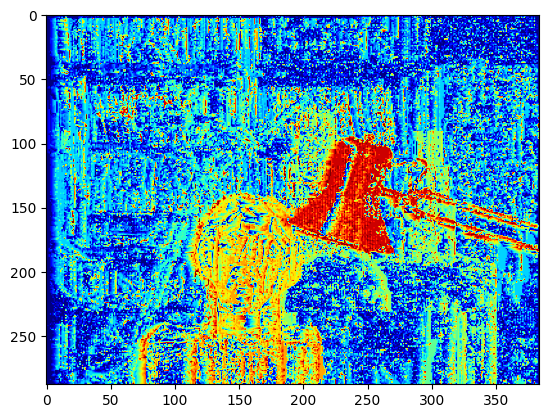

In [13]:
#calculate depth information using l1
max_value=255 #max value for l1 distance if distance between 2 pixels are 0 abs(255-0)

for y in range(height):
    for x in range(width):
        disparity=0
        cost_min=max_value

        for j in range(disparity_range):
            cost=max_value if (x-j)<0 else l1_dis(int(left_img[y,x]),int(right_img[y,x-j]))
            if cost<cost_min:
                cost_min=cost
                disparity=j

        depth[y,x]=disparity*scale
plt.imshow(depth,cmap='jet')

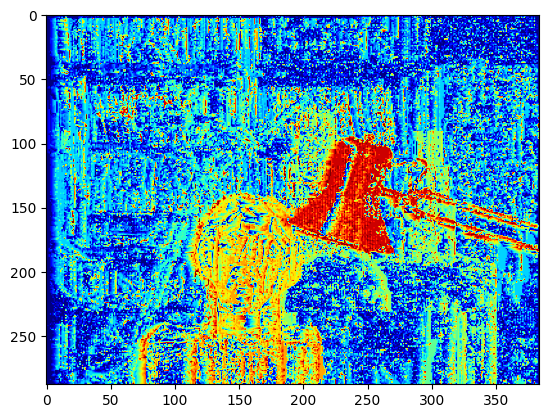

In [14]:
#calculate depth information using l1
max_value=255**2

for y in range(height):
    for x in range(width):
        disparity=0
        cost_min=max_value

        for j in range(disparity_range):
            cost=max_value if (x-j)<0 else l2_dis(int(left_img[y,x]),int(right_img[y,x-j]))
            if cost<cost_min:
                cost_min=cost
                disparity=j

        depth[y,x]=disparity*scale
plt.imshow(depth,cmap='jet')

# **WINDOW-BASED MATCHING METHOD**

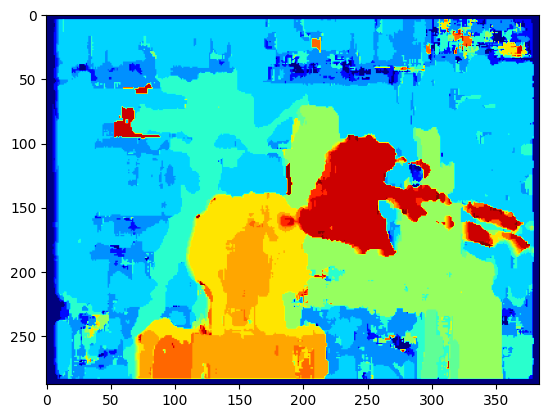

In [9]:
'''
Build a function to calculate the disparity map of two input stereo images (left image (L) and right image (R)) by windowbased matching method. The calculation steps in this method can be described through the following steps:
1. Read the left image (left) and the right image (right) as grayscale image and convert them to np.float32.
2. Initialize two variables height, width with values ​equal to the height and width of the left image.
3. Initialize a zero-zero matrix (depth) with shape equal to (height, width).
4. Calculate the half size of the window from the center to the edge of the window (of size 𝑘 × 𝑘) according to the
formula ker𝑛𝑒𝑙_ℎ𝑎𝑙𝑓 =
(𝑘−1)
2
(round to integer).
5. For each pixel at position ℎ, 𝑤 ; (ℎ ∈ 𝑘𝑒𝑟𝑛𝑒𝑙_ℎ𝑎𝑙𝑓, ℎ𝑒𝑖𝑔ℎ𝑡 − 𝑘𝑒𝑟𝑛𝑒𝑙_ℎ𝑎𝑙𝑓 , 𝑤 ∈ [
]
𝑘𝑒𝑟𝑛𝑒𝑙_ℎ𝑎𝑙𝑓, 𝑤𝑖𝑑𝑡ℎ −
𝑘𝑒𝑟𝑛𝑒𝑙_ℎ𝑎𝑙𝑓 traverse from left to right, top to bottom), perform the following steps.
'''

kernel_size=3
max_value=255*9 #window of size 3x3
kernel_half=int((kernel_size-1)/2)
disparity_range=16
scale=10

for y in range (kernel_half,height-kernel_half):
    for x in range(kernel_half,width-kernel_half):
        cost_min=np.iinfo(np.uint16).max
        disparity=0
        for j in range (disparity_range):
            total_cost=0
            value=0
            for u in range (-kernel_half,kernel_half+1):
                for v in range(-kernel_half,kernel_half+1):
                    value=max_value
                    if (x+u-j)>=0:
                        value=l1_dis(int(left_img[y+v,x+u]),int(right_img[y+v,x+u-j]))
                    total_cost=total_cost+value
            if total_cost<cost_min:
                cost_min=total_cost
                disparity=j
        depth[y,x]=disparity * scale

plt.imshow(depth,cmap='jet')

# Image with diferrent lighting

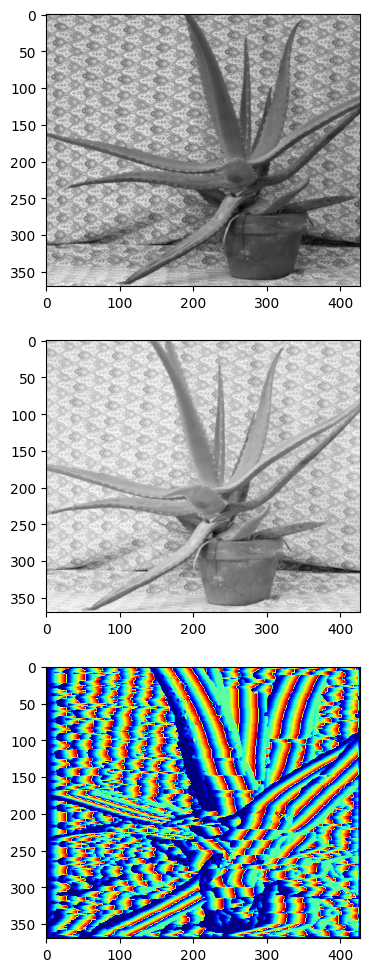

In [26]:
left_img=cv2.imread('Aloe_left_1.png',cv2.IMREAD_GRAYSCALE)
right_img=cv2.imread('Aloe_right_2.png',cv2.IMREAD_GRAYSCALE)

left_img=left_img.astype(np.float32)
right_img=right_img.astype(np.float32)

height,width=left_img.shape
depth=np.zeros((height,width),np.uint8)

kernel_size=5
max_value=255*25 #window of size 3x3
kernel_half=int((kernel_size-1)/2)
disparity_range=64
scale=10

for y in range (kernel_half,height-kernel_half):
    for x in range(kernel_half,width-kernel_half):
        cost_min=np.iinfo(np.uint16).max
        disparity=0
        for j in range (disparity_range):
            total_cost=0
            value=0
            for u in range (-kernel_half,kernel_half+1):
                for v in range(-kernel_half,kernel_half+1):
                    value=max_value
                    if (x+u-j)>=0:
                        value=l1_dis(int(left_img[y+v,x+u]),int(right_img[y+v,x+u-j]))
                    total_cost=total_cost+value
            if total_cost<cost_min:
                cost_min=total_cost
                disparity=j
        depth[y,x]=disparity * scale

fig, ax = plt.subplots(3,figsize=(12, 12))
ax[0].imshow(left_img,cmap='gray')
ax[1].imshow(right_img,cmap='gray')
ax[2].imshow(depth,cmap='jet')

-> L1 and L2 don’t have the ‘invariant to linear changes’ property
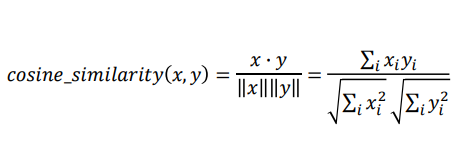

In [22]:
def norm(x):
    return np.sqrt(x.dot(x))

def cos_sim(x,y):
    return np.dot(x,y)/(norm(x)*norm(y))

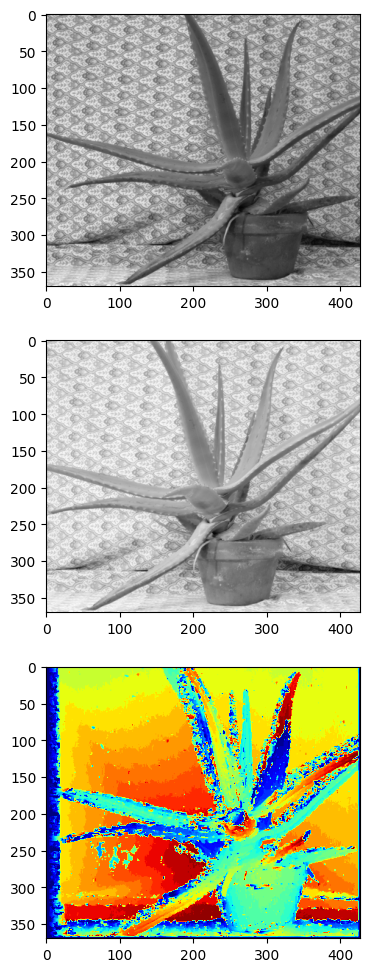

In [27]:
#Aloe image with cosine similarity
for y in range (kernel_half,height-kernel_half):
    for x in range(kernel_half,width-kernel_half):
        cost_min=-1 # cos_sim result result in [-1,1]
        disparity=0
        for j in range (disparity_range):
            cost=-1
            d=x-j #center of window in right image
            if (d-kernel_half)>0:
                l_win=left_img[(y-kernel_half):(y+kernel_half+1),(x-kernel_half):(x+kernel_half+1)]
                r_win=right_img[(y-kernel_half):(y+kernel_half+1),(d-kernel_half):(d+kernel_half+1)]

                l_flat=l_win.flatten() #flatten to vector before func cosine similarity
                r_flat=r_win.flatten()

                cost=cos_sim(l_flat,r_flat)

            if cost>cost_min: #larger cost (closer to 1) means 2 window has large similarity (contrary to L1 and L2)
                cost_min=cost
                disparity=j

        depth[y,x]=disparity * scale

fig, ax = plt.subplots(3,figsize=(12, 12))
ax[0].imshow(left_img,cmap='gray')
ax[1].imshow(right_img,cmap='gray')
ax[2].imshow(depth,cmap='jet')